In [22]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

%matplotlib inline


import preprocessing

In [3]:
user_health = preprocessing.load_users_health()

In [38]:
user_health.head()

,seqn,weight,height,bmi,upper_leg_length,upper_arm_length,arm_circumference,waist_circumference,hip_circumference,systolic,diastolic,pulse
0,109264.0,42.2,154.7,17.6,36.3,33.8,22.7,63.8,85.000000,108.000000,67.000000,93.333333
1,109266.0,97.1,160.2,37.8,40.8,34.7,35.8,117.9,126.100000,99.000000,54.333333,66.666667
2,109270.0,75.3,156.0,30.9,42.6,36.1,31.0,91.4,105.696877,124.666667,73.333333,95.333333
3,109271.0,98.8,182.3,29.7,40.1,42.0,38.2,120.4,108.200000,107.000000,67.000000,71.333333
4,109273.0,74.3,184.2,21.9,41.0,41.1,30.2,86.8,94.500000,113.666667,67.333333,70.333333


In [4]:
scaler = StandardScaler()
users = scaler.fit_transform(user_health.drop('seqn', axis=1))

In [20]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [5]:
users

array([[-1.32323607, -0.6904095 , -1.3270265 , ..., -0.64677014,
        -0.40663881,  1.96339396],
       [ 0.80022577, -0.2594959 ,  1.22576875, ..., -1.1398077 ,
        -1.52650154, -0.47869043],
       [-0.04297037, -0.5885572 ,  0.35377433, ...,  0.26626238,
         0.15329255,  2.14655029],
       ...,
       [ 1.25276682,  0.40646149,  1.27631915, ..., -0.9206799 ,
        -0.37716874,  4.31390019],
       [ 0.11948026,  1.00974054, -0.32865608, ...,  0.22974108,
        -0.43610889, -1.02815942],
       [-0.64635844,  0.31244398, -0.85943529, ...,  0.12017718,
        -1.34968111, -1.54710235]])

In [9]:
pca = PCA(n_components=3)
pca.fit(users)


PCA(n_components=3)

In [10]:
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

In [11]:
pca_samples = pca.transform(users)
ps = pd.DataFrame(pca_samples)
tocluster = pd.DataFrame(ps[[0,1,2]])
ps.head()

,0,1,2
0,-3.533536,-0.213437,0.114156
1,1.313182,1.517243,-2.196181
2,-0.037742,0.373740,0.178671
3,2.198568,-0.725590,-1.375926
4,0.062801,-2.190110,-0.726669


In [12]:
scores = []
inertia_list = np.empty(8)

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=1)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

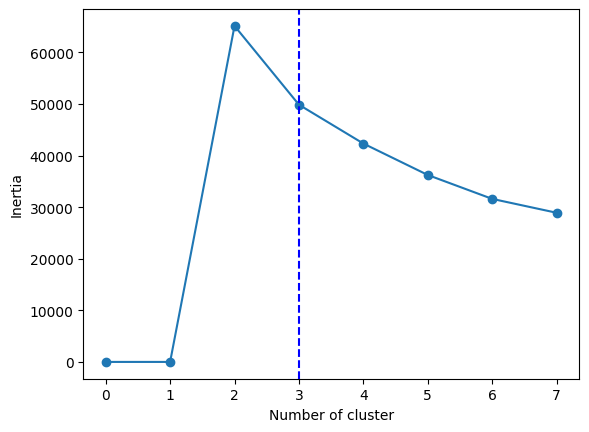

In [13]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=3, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

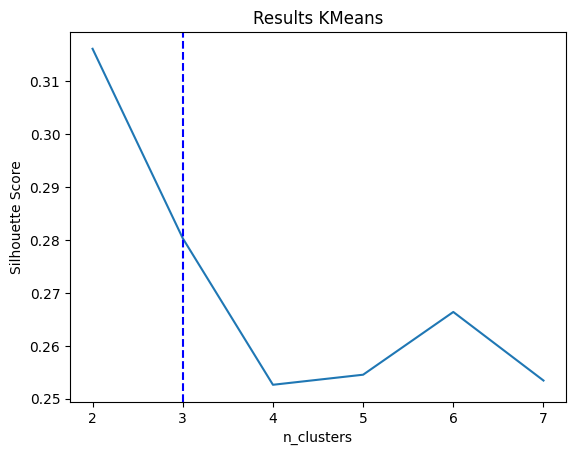

In [14]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=3, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [15]:
model = KMeans(n_clusters=3, init='k-means++', n_init=1)
model.fit(tocluster)

KMeans(n_clusters=3, n_init=1)

In [19]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

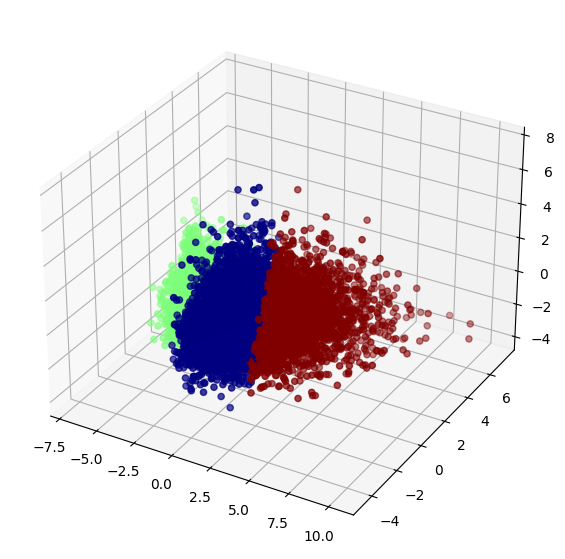

In [16]:
predicted = model.predict(tocluster)


plt.rcParams['figure.figsize'] = (10, 7)


fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(tocluster[0], tocluster[1], tocluster[2], c=predicted, cmap="jet")
plt.show()

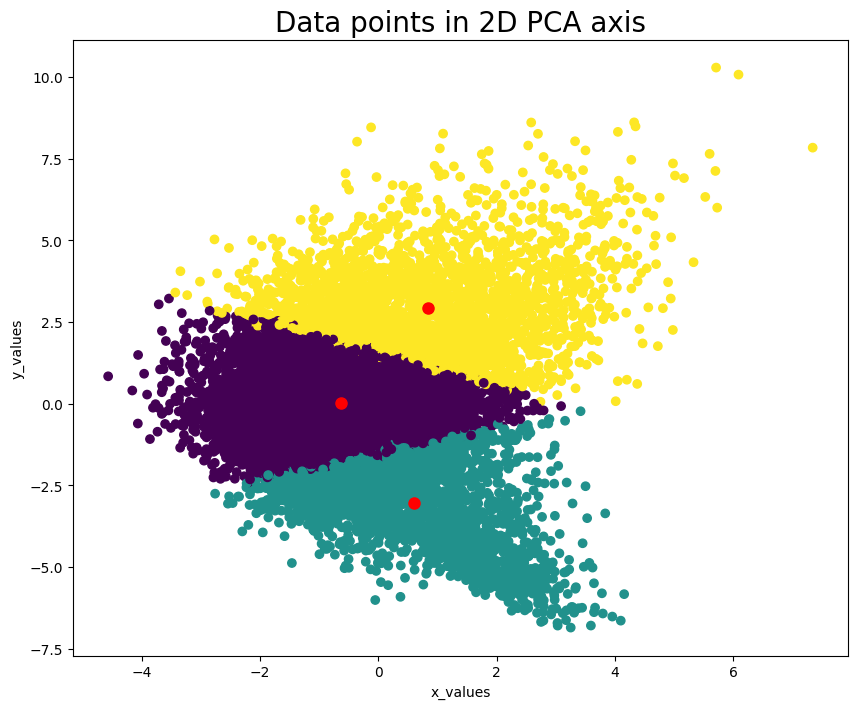

In [17]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = predicted)
for ci,c in enumerate(model.cluster_centers_):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [28]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(users)

In [33]:
with open('nbrs.pkl', 'wb') as f:
    pickle.dump(nbrs, f)

with open('users.pkl', 'wb') as f:
    pickle.dump(users, f)

In [37]:
idx_user_map = {e: u for e, u in enumerate(user_health.seqn.unique())}

with open('idx_user_map.pkl', 'wb') as f:
    pickle.dump(idx_user_map, f)